# 01 Differential Geometry for Engineers

## C) Riemannian Metrics

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE
- Texts and illustrations by [Adele Myers](https://ahma2017.wixsite.com/adelemyers) @ BioShape Lab.
- Textbook: Ch. 1 - 4.

<center><img src="figs/01_geod.png" width=400px alt="default"/></center>

### Outline

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
  - A) Manifolds
    - Our data spaces.
    - Example: a space of shapes.
  - B) Lie groups
    - Group of transformations that act on our data.
    - Example: the group of rotations.
  - **C) Riemannian Metrics**
    - Tools we use to compute on these spaces.
    - Example: helps computing a distance between two shapes.
    
<center><img src="figs/01_tools.jpeg" width=200px alt="default"/></center>


### Motivation: Elementary Operations in ML

Machine Learning (ML) relies on fundamental operations:
- $\color{#EF5645}{\text{Addition}}$: adding a vector to a point to get a point
  - $\color{#047C91}{\text{Example}}$: Minimizing a loss function with gradient descent: $x_{k+1} = x_k - \nabla_x f(x)$.
- $\color{#EF5645}{\text{Subtraction}}$: subtracting two points to get a vector
  - $\color{#047C91}{\text{Example}}$: Studying the rate of change: $x_{k+1} - x_k$.

<center><img src="figs/01_gd.png" width=500px alt="default"/></center>


- $\color{#EF5645}{\text{Distance}}$:
  - $\color{#047C91}{\text{Example}}$: In $K$-nearest neighbors, we find the "nearest neighbors" by computing distances.
  
<center><img src="figs/01_knn.png" width=300px alt="default"/></center>

- $\color{#EF5645}{\text{Straight Line}}$:
  - $\color{#047C91}{\text{Example}}$: In linear regression, we fit a straight line.
  
<center><img src="figs/01_lr.png" width=400px alt="default"/></center>

Machine Learning on manifolds needs to generalize the operations:

- $\color{#EF5645}{\text{Addition}}$: add a vector to a point
  - $\rightarrow$ $\color{#047C91}{\text{Exponential}}$
- $\color{#EF5645}{\text{Subtraction}}$: subtract two points
  - $\rightarrow$ $\color{#047C91}{\text{Logarithm}}$
- $\color{#EF5645}{\text{Distance}}$: compute distance between two points 
  - $\rightarrow$ $\color{#047C91}{\text{Geodesic Distance}}$
- $\color{#EF5645}{\text{Straight Line}}$: compute curve of shortest length between two points 
  - $\rightarrow$ $\color{#047C91}{\text{Geodesic}}$

For this, we need a "tool": the Riemannian metric.

### C) Riemannian Metrics: Outline

You will learn:

1. **What is a Riemannian metric?**
2. From straight lines to geodesics
3. From addition/subtraction to exponential/logarithm map
4. From euclidean distance to Riemannian distance

### 1. What is a Riemannian metric?

$\color{#EF5645}{\text{Intuition}}$: Take a manifold $M$. A Riemannian metric on $M$ is denoted $<,>$ and:
- gives you the inner-product $<u,v>_p$ between two tangent vectors $u$ and $v$ at the same tangent space $T_pM$,
- gives you the angle between two vectors, but also the norm of a vector.

<center><img src="figs/02_tangentspace.jpg" width=400px alt="default"/></center>

### Precise Mathematical definition

$\color{#EF5645}{\text{Definition}}$: A _Riemannian metric_ on $M$ is a family $\left(\langle\cdot, \cdot\rangle_{p}\right)_{p \in M}$ of inner products on each tangent space $T_{p} M$, such that $\langle\cdot, \cdot\rangle_{p}$ depends smoothly on $p$. A pair $(M,\langle\cdot, \cdot\rangle)$ is called a _Riemannian manifold_.

$\color{#EF5645}{\text{Remark}}$: A metric is also written $g=\left(g_{p}\right)_{p \in M}$, where $g_{p}$ is the symmetric positive definite (SPD) matrix representing the inner-product.

$\rightarrow$ Note that "$g$" is used for an element of a group $G$ and a metric.

<center><img src="figs/02_tangentspace.jpg" width=300px alt="default"/></center>

A Riemannian metric is a "tool" that will allow us to generalize the elementary operations needed for ML to manifolds.

Rules that are true for all Riemannian metrics are implemented in a parent class `RiemannianMetric`. Rules that are true for some metrics are implemented in the child classes.

A Riemannian metric "equips" a manifold: it becomes an attribute of the manifold. Note that a given manifold can have several metrics.

<center><img src="figs/01_connection_metrics.png" width=700px alt="default"/></center>

In [3]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal


sphere = Hypersphere(dim=2)
print(sphere.metric)

### Levi-Civita Connection

$\color{#EF5645}{\text{"Theorem"}}$: A Riemannian metric gives us a unique "special" connection called the Levi-Civita connection and given by the "Koszul formula"


$$
\Gamma_{i j}^{k}=\frac{1}{2} \sum_{l=1}^dg^{-1}_{l k}\left(\partial_{i} g_{j l}+\partial_{j} g_{l i}-\partial_{l} g_{i j}\right).
$$

$\color{#EF5645}{\text{Remark}}$: Thus, every Riemannian metric gives us all the tools of the connection (exp, log, geodesics) and more!

<center><img src="figs/01_connection.png" width=700px alt="default"/></center>

### C) Riemannian Metrics: Outline

You will learn:

1. What is a Riemannian metric?
2. **From straight lines to geodesics**
3. From addition/subtraction to exponential/logarithm map
4. From euclidean distance to Riemannian distance

### 2. From Straight Line to Geodesic


$\color{#EF5645}{\text{Intuition}}$: The generalization of the straight line for manifolds is the geodesic.

We can use the `geodesic` method from the `sphere.metric` object.

### Geodesic on the sphere

Compute the geodesic starting from a point with a given initial vector.

In [11]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point = np.array([-0.65726771, -0.02678122, 0.7531812]); point = point / np.linalg.norm(point)
vector = np.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.geodesic(initial_tangent_vec=tangent_vector, initial_point=point)
points_on_geodesic = result(np.linspace(0.0, 1.0, 30))

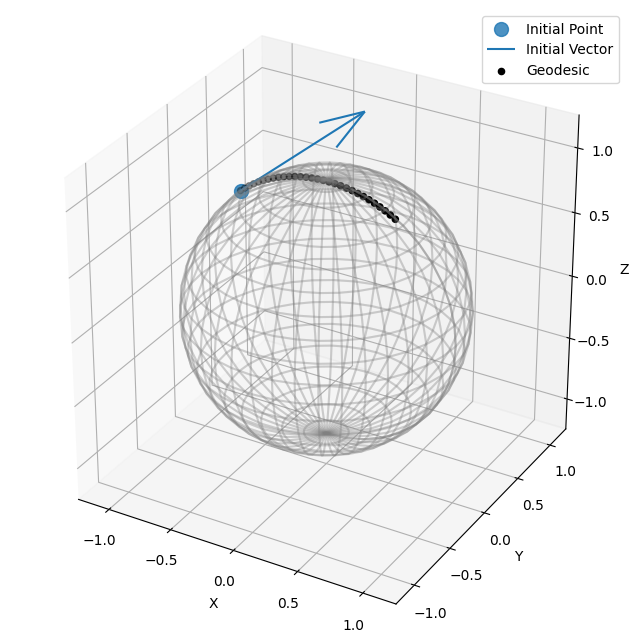

In [13]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz
fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Initial Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Initial Vector")
ax = viz.plot(points_on_geodesic, ax=ax, space="S2", color="black", label="Geodesic")

ax.legend();

### Geodesic on a more complicated manifold

Compute the geodesic between two points.

In [18]:
from geomstats.geometry.discrete_curves import R2, DiscreteCurves, SRVMetric
import geomstats.datasets.utils as data_utils

cells, _, _ = data_utils.load_cells()
curve_space = DiscreteCurves(R2); metric = curve_space.metric
cell1 = cells[69] - np.mean(cells[69], axis=0); cell2 = cells[76] - np.mean(cells[76], axis=0)
geodesic = metric.geodesic(initial_point=cell1, end_point=cell2)

n_times = 80; times = np.linspace(0.0, 1.0, n_times); geod_points = geodesic(times)

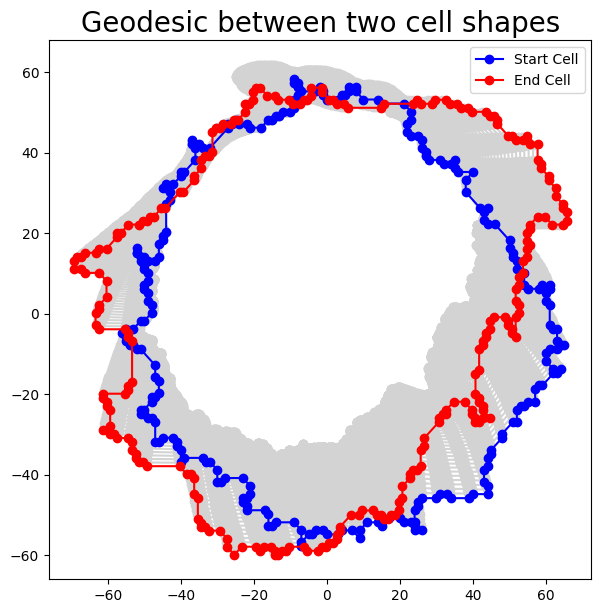

In [20]:
plt.figure(figsize=(7, 7))
for i in range(1, n_times - 1):
    plt.plot(geod_points[i, :, 0], geod_points[i, :, 1], "o-", color="lightgrey")
plt.plot(geod_points[0, :, 0], geod_points[0, :, 1], "o-b", label="Start Cell")
plt.plot(geod_points[-1, :, 0], geod_points[-1, :, 1], "o-r", label="End Cell")

plt.title("Geodesic between two cell shapes", fontsize=20); plt.legend();

### Mathematical Definition


$\color{#EF5645}{\text{"Theorem"}}$: A Riemannian metric gives us a tool called the _Levi-Civita connection_ and given by the "Koszul formula" for its _Christoffel symbols_:

$$
\Gamma_{i j}^{k}=\frac{1}{2} \sum_{l=1}^dg^{-1}_{l k}\left(\partial_{i} g_{j l}+\partial_{j} g_{l i}-\partial_{l} g_{i j}\right).
$$
This tool allows us to define the notion of parallelism on manifolds.

$\color{#EF5645}{\text{Definition:}}$ Consider $M$ a manifold. A curve $\gamma:[0, 1] \rightarrow M$ is a _geodesic_ of $M$ if it is "auto-parallel":

$$
\nabla_{\dot{\gamma(t)}} \dot{\gamma}(t)=0 \text{ for all $t \in [0, 1]$.}
$$
The equation above is called the _geodesic equation_, and can be written:

$$
\ddot{\gamma}^{k}(t)+\Gamma_{i j}^{k} \dot{\gamma}^{i}(t) \dot{\gamma}^{j}(t)=0 .
$$



$\color{#EF5645}{\text{Remarks:}}$ 
- The tangent vector $\dot \gamma$ to the curve $\gamma$ stays parallel (to itself) when transported along the curve.
- The term $\nabla_{\dot{\gamma}} \dot{\gamma}$ can be interpreted as the acceleration along $\gamma$: geodesics are curves with zero acceleration.
- The geodesics are also "distance-minimizing" for a notion of distance that we will define.

$\color{#047C91}{\text{Example}}$: Geodesics and trajectories of shapes.

<center><img src="figs/01_brain_trajectories.png" width=600px alt="default"/></center>


### C) Riemannian Metrics: Outline

You will learn:

1. What is a Riemannian metric?
2. From straight lines to geodesics
3. **From addition/subtraction to exponential/logarithm map**
4. From euclidean distance to Riemannian distance

### 3. From Addition to Exponential Map

$\color{#EF5645}{\text{Intuition}}$: The generalization of the addition for manifolds is the exponential. Note that it is (in general) different from the exponential function.

We can use the `exp` method from the `sphere.metric` object.

In [23]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point = np.array([-0.65726771, -0.02678122, 0.7531812]); point = point / np.linalg.norm(point)
vector = np.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.exp(tangent_vector, base_point=point)

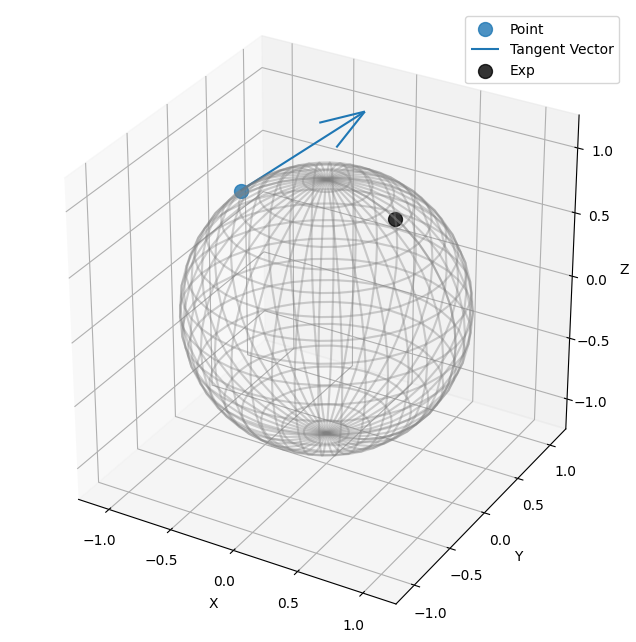

In [25]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Tangent Vector")
ax = viz.plot(result, ax=ax, space="S2", s=100, alpha=0.8, label="Exp", color="black")
ax.legend();

### Mathematical Definition

$\color{#EF5645}{\text{Definition}}$: Consider a manifold $M$. The $\operatorname{map}$ that "shoots" from a point $x$ with a tangent vector $v$ using the geodesic $\gamma$
$$(x, v) \mapsto \operatorname{Exp}_{x}(u) = \gamma(1)$$ 

is called the _exponential map_.


### From Subtraction to Logarithm

$\color{#EF5645}{\text{Intuition}}$: The generalization of the subtraction for manifolds is the logarithm. Note that it is (in general) different from the logarithm function.

We can use the `log` method from the `sphere.metric` object.

In [29]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point1 = np.array([-0.48202861, 0.61760022, 0.62146471]); point1 /= np.linalg.norm(point1)
point2 = np.array([0.50862172, -0.25293377, -0.82299967]); point2 /= np.linalg.norm(point2)

result = sphere.metric.log(point2, base_point=point1)

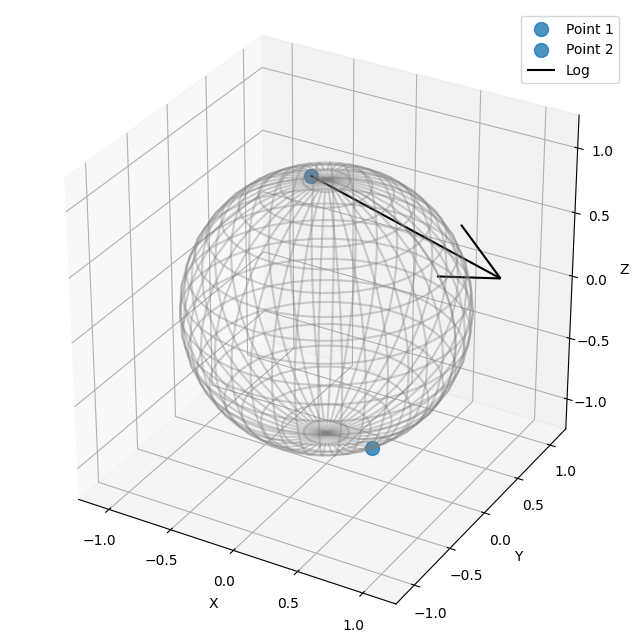

In [31]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point1, ax=ax, space="S2", s=100, alpha=0.8, label="Point 1", c="C0")
ax = viz.plot(point2, ax=ax, space="S2", s=100, alpha=0.8, label="Point 2", c="C0")
arrow = viz.Arrow3D(point1, vector=result); arrow.draw(ax, color="black", label="Log")
ax.legend();

### Mathematical Definition

$\color{#EF5645}{\text{Definition}}$: The logarithm map is the inverse of the exponential map, whenever an inverse exists (see details in textbook). 

Given two points on the manifold $x_1$ and $x_2$, the logarithm map of $x_2$ at $x_1$ gives us the tangent vector $u$ that we should use to reach $x_2$ from $x_1$.

### C) Riemannian Metrics: Outline

You will learn:

1. What is a Riemannian metric?
2. From straight lines to geodesics
3. From addition/subtraction to exponential/logarithm map
4. **From Euclidean distance to Riemannian distance**

### 4. From Euclidean to  Riemannian distance

$\color{#EF5645}{\text{Length of a curve:}}$ We define the length of the curve $\gamma:[0, 1] \rightarrow M$ by:

$$
L(\gamma)=\int_{0}^{1}\|\dot{\gamma}(t)\|_{\gamma(t)} dt.
$$


$\color{#EF5645}{\text{Definition:}}$ The _Riemannian distance_ between $x_1$ and $x_2$ is the length of the shortest curve (the geodesic) joining $x_1$ to $x_2$ :

$$
d(x, y)=\inf \left\{L(\gamma) \mid \gamma: [0, 1] \rightarrow M , \gamma(0)=x_1, \gamma(1)=x_2\right\}.
$$

<center><img src="figs/01_tools.jpeg" width=400px alt="default"/></center>


$\color{#047C91}{\text{Example}}$: Distances between brain connectomes.

1 0


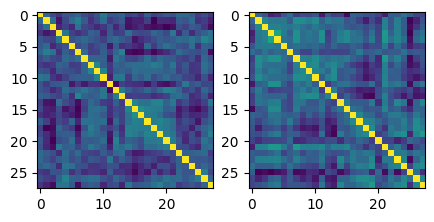

In [39]:
import matplotlib.pyplot as plt
import geomstats.datasets.utils as data_utils

connectomes, patient_id, label = data_utils.load_connectomes()
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(121); imgplot = ax.imshow(connectomes[0])
ax = fig.add_subplot(122); imgplot = ax.imshow(connectomes[1])
print(label[0], label[1])

In [45]:
from geomstats.geometry.spd_matrices import SPDMatrices

print(connectomes[0].shape)
spd = SPDMatrices(n=28)
print(f"Connectome 0 belongs to this manifold: {spd.belongs(connectomes[0])}")

metric = spd.metric

print(metric.dist(connectomes[0], connectomes[2]))
label[2]

(28, 28)
Connectome 0 belongs to this manifold: True
3.314966732630056


0

### Take-Aways

- A Riemmanian metric "equips" a manifold and provides a set of tools to compute on it.
- Specifically, we can generalize additional, subtraction, straight line and distances to manifolds, which will be useful to define machine learning.
- In Python, the metric is an attribute of the manifold, whose methods provide the operations of interest.